In [ ]:
import numpy as np
import pandas as pd

train = pd.read_csv('train_finals_knn.csv')
test = pd.read_csv('test_finals_knn.csv')

In [ ]:
df = [train, test]
for i in df:
  i.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
X = train.drop(['Transported'], axis = 1)
y = train['Transported']
X_test = test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X,y , random_state=104, train_size=0.8, shuffle=True)

##**Modelling**##

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
print('Accuracy Score = ', accuracy_score(y_pred, y_valid))

Accuracy Score =  0.7855089131684876


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
print('Accuracy Score = ', accuracy_score(y_pred, y_valid))

Accuracy Score =  0.7717078780908568


**Support Vector Machine**

In [ ]:
from sklearn import svm

model = svm.SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
print('Accuracy Score = ', accuracy_score(y_pred, y_valid))

Accuracy Score =  0.7952846463484762


**AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
print('Accuracy Score = ', accuracy_score(y_pred, y_valid))

Accuracy Score =  0.7878090856814262


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
print('Accuracy Score = ', accuracy_score(y_pred, y_valid))

Accuracy Score =  0.7866589994249569


**LightGBM**

In [ ]:
from lightgbm import LGBMClassifier

model = LGBMClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
print('Accuracy Score = ', accuracy_score(y_pred, y_valid))

Accuracy Score =  0.7906843013225991


**XGBoost**

In [ ]:
!pip install xgboost
from xgboost import XGBClassifier

model = XGBClassifier(early_stopping=False,
                               l2_regularization=13.899123839488654,
                               learning_rate=0.021061811419531614, max_depth=4,
                               max_iter=1000, max_leaf_nodes=64,
                               min_samples_leaf=46)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
print('Accuracy Score = ', accuracy_score(y_pred, y_valid))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[01:09:55] WARNING: ../src/learner.cc:767: 
Parameters: { "early_stopping", "l2_regularization", "max_iter", "max_leaf_nodes", "min_samples_leaf" } are not used.

Accuracy Score =  0.7941345600920069


**HistGradientBoosting**

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

model = HistGradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
print("Accuracy: ", accuracy_score(y_valid, y_pred))

Accuracy:  0.7872340425531915


**CatBoostClassifier**

In [ ]:
#!pip install catboost
#from catboost import CatBoostClassifier

#model = CatBoostClassifier()
#model.fit(X_train, y_train)
#y_pred = model.predict(X_valid)
#y_valid = y_valid.astype('str')
#print('Accuracy Score = ', accuracy_score(y_pred, y_valid))

**Stacking Classifier**

In [ ]:
from sklearn.ensemble import StackingClassifier

model1 = XGBClassifier(colsample_bytree = 0.6,
                       gamma = 1.5, max_depth = 4,
                       min_child_weight = 1, subsample = 1.0)
#model2 = HistGradientBoostingClassifier()
model3 = LGBMClassifier()
model = StackingClassifier(estimators=[('lr', model1), ('lgb', model3)])
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
print("Accuracy: ", accuracy_score(y_pred, y_valid))

Accuracy:  0.7981598619896493


**Voting Classifier**

In [ ]:
from sklearn.ensemble import VotingClassifier

model1 = XGBClassifier(colsample_bytree = 0.6,
                       gamma = 1.5, max_depth = 4,
                       min_child_weight = 1, subsample = 1.0)
model2 = HistGradientBoostingClassifier()
model3 = LGBMClassifier()
model = VotingClassifier(estimators=[('lr', model1), ('rf', model2), ('lgb', model3)], voting = 'hard')
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
print("Accuracy: ", accuracy_score(y_pred, y_valid))

Accuracy:  0.7912593444508338


##**Hyperparameter Tuning**##

**Light GBM**

In [ ]:
from sklearn.model_selection import GridSearchCV
import time

start = time.time()
gridParams = {
    'learning_rate': [0.005, 0.01],
    'n_estimators': [8,16,24],
    'num_leaves': [6,8,12,16], # large num_leaves helps improve accuracy but might lead to over-fitting
    'boosting_type' : ['gbdt', 'dart'], # for better accuracy -> try dart
    'objective' : ['binary'],
    'max_bin':[255, 510], # large max_bin helps improve accuracy but might slow down training progress
    'random_state' : [500],
    'colsample_bytree' : [0.64, 0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }

grid = GridSearchCV(LGBMClassifier(), gridParams, verbose=1, cv=4, n_jobs=-1)
Run the grid
grid.fit(X, y)

Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)
end = time.time()
print('Elapsed Time: ', end-start)

**XGBoost**

In [ ]:
start = time.time()

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

grid = GridSearchCV(XGBClassifier(), gridParams, verbose=1, cv=4, n_jobs=-1)
Run the grid
grid.fit(X, y)

Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)
end = time.time()
print('Elapsed Time: ', end-start)

##**Feature Importance**##

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

model1 = XGBClassifier(colsample_bytree = 0.6,
                       gamma = 1.5, max_depth = 4,
                       min_child_weight = 1, subsample = 1.0)
#model2 = HistGradientBoostingClassifier()
model3 = LGBMClassifier()
model = StackingClassifier(estimators=[('lr', model1), ('lgb', model3)])
model.fit(X, y)

result = permutation_importance(
    model, X, y, n_repeats=10, random_state=42, n_jobs=2)

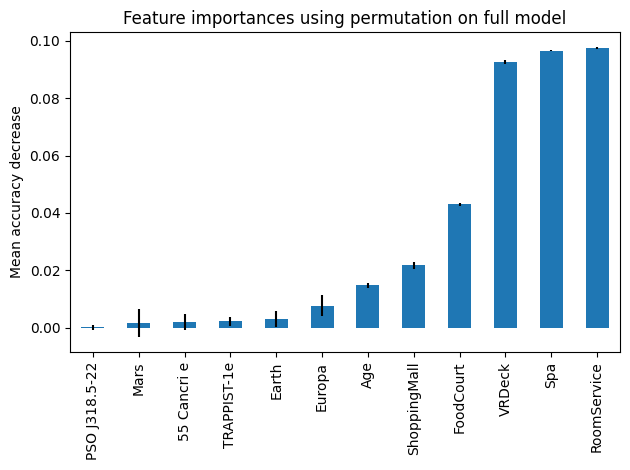

In [ ]:
feature_names = X.columns
forest_importances = pd.Series(result.importances_mean, index=feature_names).sort_values(ascending=True)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

##**Visualizations**##

<Axes: title={'center': 'Confusion Matrix'}>

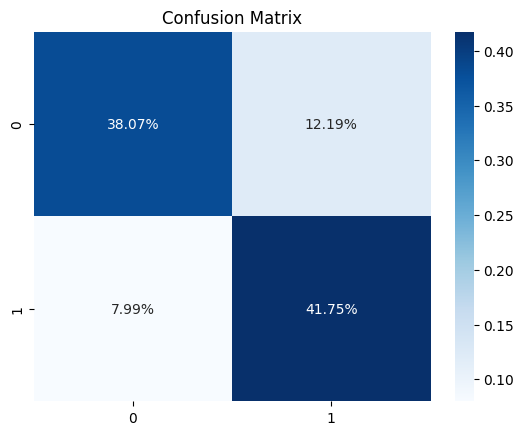

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

model1 = XGBClassifier(colsample_bytree = 0.6,
                       gamma = 1.5, max_depth = 4,
                       min_child_weight = 1, subsample = 1.0)
#model2 = HistGradientBoostingClassifier()
model3 = LGBMClassifier()
model = StackingClassifier(estimators=[('lr', model1), ('lgb', model3)])
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
cf_matrix = confusion_matrix(y_valid, y_pred)
plt.title('Confusion Matrix')
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

##**Submission to CSV**##

In [ ]:
#testt = pd.read_csv('test.csv')
#testt

In [ ]:
#index = testt['PassengerId']

In [ ]:
#from sklearn.ensemble import StackingClassifier

#model1 = XGBClassifier()
#model2 = HistGradientBoostingClassifier()
#model3 = LGBMClassifier()
#model = StackingClassifier(estimators=[('lr', model1), ('lgb', model3)])
#model.fit(X, y)
#y_pred = model.predict(X_test)

In [ ]:
#submit = pd.DataFrame()
#submit['PassengerId'] = index
#submit['Transported'] = y_pred
#submit.to_csv('submit_kenyot_enak.csv', index = False)